# Denoise microvilli stacks
Improve our ability to measure microvilli angle by summing across a certain number of adjacent slices  
TODO: add save function

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
om = 'C6'
#vol_path = "~/Data/200812_rhab/omC6_axon_to_lens_im_rotated_crop.npz"
vol_path = f"/mnt/ceph/data/neuro/wasp_em/nchua/200817_rhab_xsections/om{om}_axon_to_lens_im_rotated_crop.npz"
with np.load(os.path.expanduser(vol_path)) as data:
    vol = data['im_crop'][400:1200, 400:1200] 

In [37]:
step = 200  # distance (in z) between each slices in the output stack
sum_interval = 20  # number of slices to average across for denoising (even number)
start = 2300
end = 800

n_intervals = np.floor((start-end)/step).astype(int)
delta = int(sum_interval/2)

In [38]:
n_intervals

7

0
2300
1
2100
2
1900
3
1700
4
1500
5
1300
6
1100


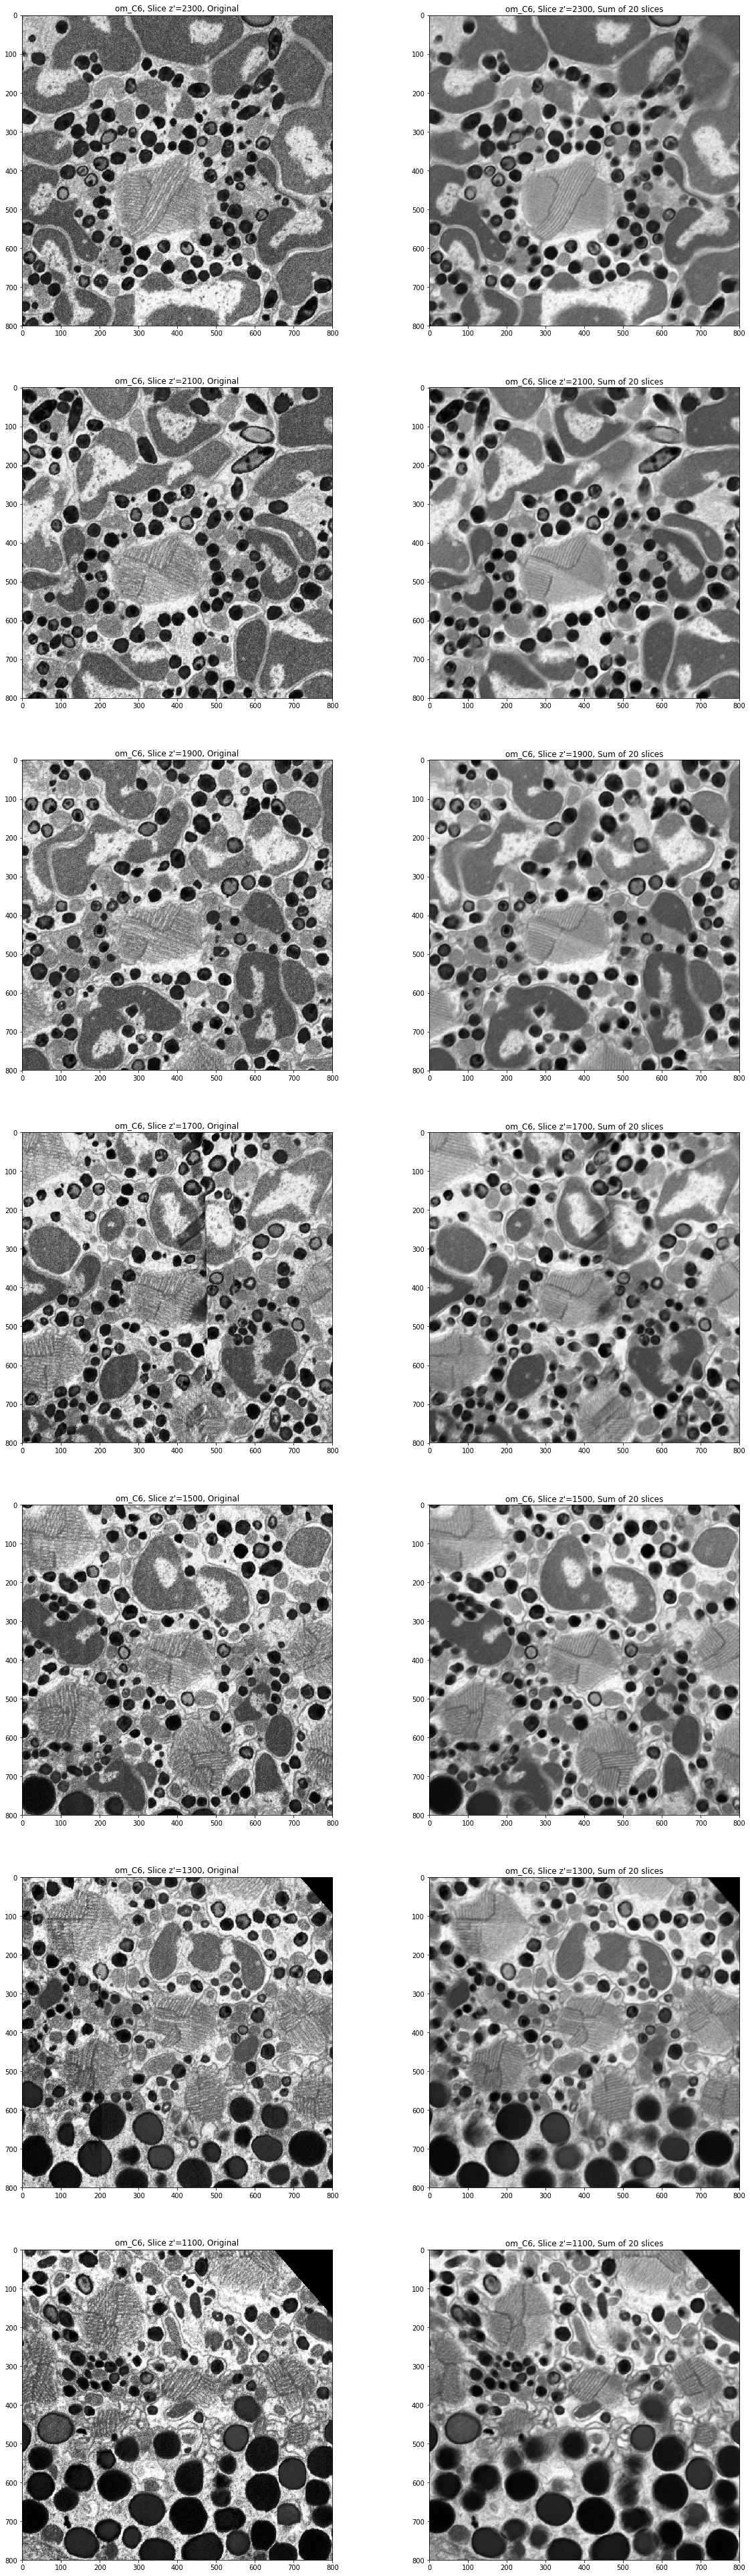

In [39]:
### PREVIEW ###
fig, ax = plt.subplots(n_intervals, 2, figsize=[20, n_intervals*10])

for i, ii in zip(range(0, n_intervals), range(start, end, -step)):
    print(i)
    print(ii)
    ax[i, 0].imshow(vol[:, :, ii], cmap='gray', aspect='equal')
    ax[i, 1].imshow(vol[:, :, ii-delta:ii+delta].sum(axis=2), cmap='gray', aspect='equal')
    
    ax[i, 0].set_title(f"om_{om}, Slice z'={ii}, Original")
    ax[i, 1].set_title(f"om_{om}, Slice z'={ii}, Sum of {sum_interval} slices")